# Model Evaluation

In this notebook I will evaluate my model and examine some of its most important features. If my model score above a $70\%$ accuracy I will call this a success.

In [55]:
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


Loading in my model and dataframes

In [90]:
with open('./gs_svd.pkl', 'rb') as f:
    lr = pickle.load(f)
with open('./SVD.pkl', 'rb') as f:
    SVD = pickle.load(f)

In [91]:
X_train_svd = pd.read_csv('./X_train_svd.csv',index_col=0)

In [92]:
X_test_svd = pd.read_csv('./X_test_svd.csv',index_col=0)

In [93]:
y_test_boot = pd.read_csv('./y_test_boot.csv',index_col=0)

In [94]:
y_train_boot = pd.read_csv('./y_train_boot.csv',index_col=0)

Scoring my model

In [95]:
lr.score(X_test_svd,y_test_boot)

0.7191297701284836

My nodel beat my threshold of $70\%$ with a score of $71.9\%$

Let's get an idea of how my model predicted. It is shown directly below that my my positive class was $4208$ long and my negative class was $4099$ long. I ended up predicting $2636$ out of $4208$ positive observations correctly. So my true positive rate is about $66\%$. My false negative rate (which we would want to minize, becuase it means we missed spotting a hit) was only about $34\%$.

In [96]:
sum(y_test_boot['hot100'])

4208.0

In [97]:
len(y_test_boot['hot100']) - sum(y_test_boot['hot100'])

4099.0

In [98]:
predictions = lr.predict(X_test_svd)

In [99]:
cm = confusion_matrix(y_test_boot, predictions)

In [100]:
cm_df = pd.DataFrame(cm, columns = ['predicted not a hit', 'predicted a hit'], index = ['actual not a hit', 'actual hit'])
cm_df

,predicted not a hit,predicted a hit
actual not a hit,2915,1184
actual hit,1572,2636


Since SVD creates components that explain the max amount of variance in sequential components, let's look at an explained variance vs. component graph

Text(0.5, 1.0, 'Explained variance by component')

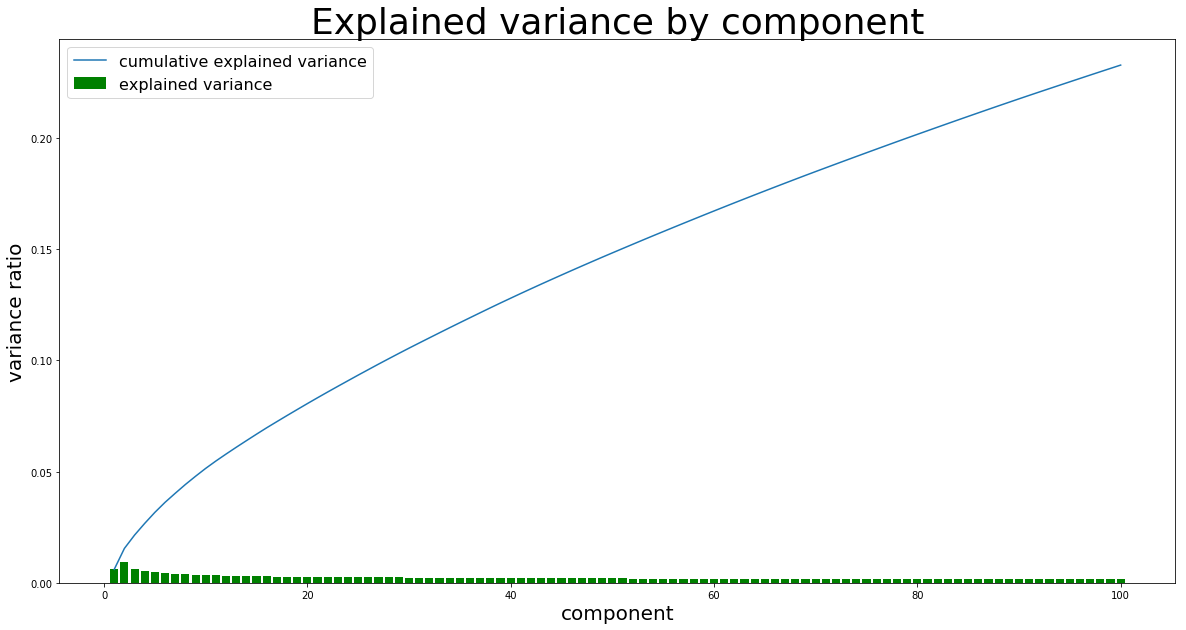

In [31]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(100))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(100))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36)

At 100 components, only about $24\%$ of the variance is explained. This is not neccessarily a bad thing - I could always add more components and explain more variance - but this runs the risk of overfitting my model.

Let's look at the most important components in my model

In [75]:
coef = pd.DataFrame(lr.best_estimator_.coef_, columns = X_train_svd.columns).T

coef = coef.sort_values(by = 0, ascending=False)

coef.head(10)

,0
11,3.775971
78,3.727019
44,3.438525
2,3.263906
71,2.917830
3,2.869138
91,2.320862
32,2.270178
14,2.255538
26,2.242526


Let's further examine component 11, 78, and 44, since they are the most important

Creating a loadings dataframe so I can examine components

In [62]:
df_token = pd.read_csv('./df_token.csv',index_col=0)

In [63]:
component_names = ["component_"+str(i+1) for i in range(100)]

In [66]:
loadings = pd.DataFrame(SVD.components_,
                        index=component_names,
                        columns=df_token.columns).T

In [70]:
loadings['abs_component_44'] = np.abs(loadings.component_44)
loadings['abs_component_4'] = np.abs(loadings.component_4)
loadings['abs_component_51'] = np.abs(loadings.component_51)
loadings['abs_component_12'] = np.abs(loadings.component_12)
loadings['abs_component_78'] = np.abs(loadings.component_78)



In [49]:
loadings.sort_values('abs_component_11',ascending=False).head(20)[['component_11']].head(10)

,component_11
money,0.392595
girl,-0.308857
wanna,0.283716
way,0.260572
hey,0.220432
fuck,-0.193460
shit,-0.185669
shawty,0.134088
live,0.131656
man,-0.110059


The most important component, component 11, appears to be about money and specifically not about girls

In [68]:
loadings.sort_values('abs_component_78',ascending=False).head(20)[['component_78']].head(10)

,component_78
yea,0.196598
clap,0.158650
dem,0.154622
forever,-0.146954
ooh,-0.138709
started,-0.132842
place,0.130040
chick,-0.129739
gucci,0.122101
alright,-0.121279


The second most important component's most important words are yea, clap, and dem (slang for 'them'), so this component is possibly about getting hyped? Sometimes the topic is not so clear

In [71]:
loadings.sort_values('abs_component_44',ascending=False).head(20)[['component_44']].head(10)

,component_44
lie,0.254760
say,-0.189265
real,-0.187209
forever,0.172859
fuck,-0.138644
lady,-0.135992
alive,0.126153
boy,0.119757
want,0.117192
wave,0.116721


The third most important component seems to be talking about lying, or deceiving, and things that are not real. In the next notebook we'll look at some graphs of the data to get a better understanding of rap lyrics and its patterns